# GOES Proton Flux

- https://services.swpc.noaa.gov/json/goes/primary/
- https://www.swpc.noaa.gov/products/goes-proton-flux

In [ ]:
import pandas as pd

In [ ]:
goes_json_data = pd.read_json("https://services.swpc.noaa.gov/json/goes/primary/integral-protons-7-day.json")

In [ ]:
goes_json_data

,time_tag,satellite,flux,energy
0,2025-02-09T09:05:00Z,18,0.575670,>=1 MeV
1,2025-02-09T09:05:00Z,18,0.190670,>=10 MeV
2,2025-02-09T09:05:00Z,18,0.173670,>=100 MeV
3,2025-02-09T09:05:00Z,18,0.178670,>=30 MeV
4,2025-02-09T09:05:00Z,18,0.203670,>=5 MeV
...,...,...,...,...
16115,2025-02-16T08:55:00Z,18,0.151015,>=30 MeV
16116,2025-02-16T08:55:00Z,18,0.161015,>=5 MeV
16117,2025-02-16T08:55:00Z,18,0.151015,>=50 MeV
16118,2025-02-16T08:55:00Z,18,0.132015,>=500 MeV


In [ ]:
sat = str(goes_json_data['satellite'].unique()[0])
sat

'18'

In [ ]:
goes_json_data['energy'].unique()

array(['>=1 MeV', '>=10 MeV', '>=100 MeV', '>=30 MeV', '>=5 MeV',
       '>=50 MeV', '>=500 MeV', '>=60 MeV'], dtype=object)

In [ ]:
# goes_1mev = goes_json_data[goes_json_data['energy'] == '>=1 MeV']
# goes_5mev = goes_json_data[goes_json_data['energy'] == '>=5 MeV']
goes_10mev = goes_json_data[goes_json_data['energy'] == '>=10 MeV']
# goes_30mev = goes_json_data[goes_json_data['energy'] == '>=30 MeV']
goes_50mev = goes_json_data[goes_json_data['energy'] == '>=50 MeV']
# goes_60mev = goes_json_data[goes_json_data['energy'] == '>=60 MeV']
goes_100mev = goes_json_data[goes_json_data['energy'] == '>=100 MeV']
goes_500mev = goes_json_data[goes_json_data['energy'] == '>=500 MeV']

In [ ]:
# print(len(goes_1mev))
# print(len(goes_5mev))
print(len(goes_10mev))
# print(len(goes_30mev))
print(len(goes_50mev))
# print(len(goes_60mev))
print(len(goes_100mev))
print(len(goes_500mev))

2015
2015
2015
2015


In [ ]:
from sunpy.time import parse_time
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

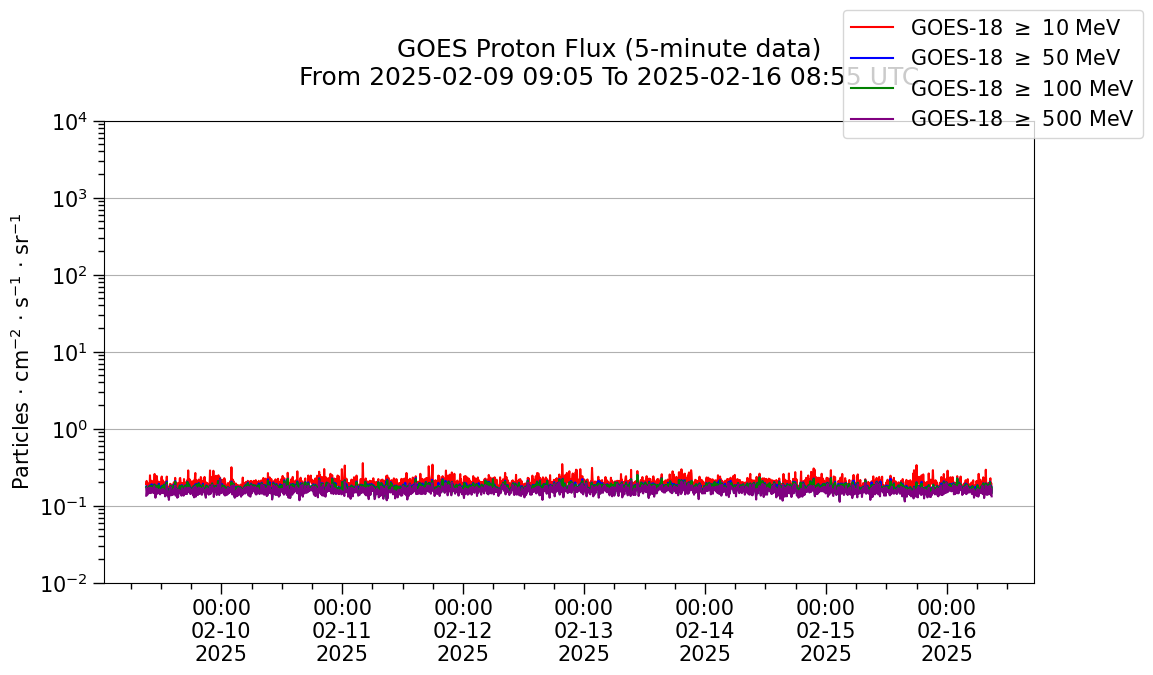

In [ ]:
sat = str(goes_json_data['satellite'].unique()[0])

plt.rcParams.update({'font.size': 15})

time_tag = parse_time(goes_10mev['time_tag']).datetime
first_time = time_tag[0]
last_time = time_tag[-1]

now = datetime.now(timezone.utc)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(parse_time(goes_10mev['time_tag']).datetime, goes_10mev['flux'].values,
        label=f'GOES-{sat} $\geq$ 10 MeV', color='red')
ax.plot(parse_time(goes_50mev['time_tag']).datetime, goes_50mev['flux'].values,
        label=f'GOES-{sat} $\geq$ 50 MeV', color='blue')
ax.plot(parse_time(goes_100mev['time_tag']).datetime, goes_100mev['flux'].values,
        label=f'GOES-{sat} $\geq$ 100 MeV', color='green')
ax.plot(parse_time(goes_500mev['time_tag']).datetime, goes_500mev['flux'].values,
        label=f'GOES-{sat} $\geq$ 500 MeV', color='purple')

ax.set_yscale('log')
ax.set_ylim(1e-2, 1e4)
ax.set_ylabel(r"Particles $\cdot$ cm$^{-2}$ $\cdot$ s$^{-1}$ $\cdot$ sr$^{-1}$")

# set grid and ticks
ax.yaxis.grid(True, "major")
ax.xaxis.grid(False, "major")
ax.tick_params(axis='x', which='minor', length=4, width=1, color='black')
ax.tick_params(axis='x', which='major', length=8, width=1, color='black')
ax.tick_params(axis='y', which='minor', length=4, width=1, color='black')
ax.tick_params(axis='y', which='major', length=8, width=1, color='black')

plt.xticks(rotation=0)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d\n%Y'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))

fig.legend()
plt.title(f"""
          GOES Proton Flux (5-minute data)
          From {first_time.strftime("%Y-%m-%d %H:%M")} To {last_time.strftime("%Y-%m-%d %H:%M")} UTC
          """)
plt.show()